In [18]:
%matplotlib inline

# Import Zipline functions that we need
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

# Import date and time zone libraries
from datetime import datetime
import pytz

# Import visualization
import matplotlib.pyplot as plt

import quandl
quandl.ApiConfig.api_key = 'VqqfBsnjy7pTe1sAp8-Y'

print('all imports done')




all imports done


In [21]:
# mydata = quandl.get("WIKI/AAPL")
# print(mydata[:3])
# print(mydata[-3:])

# Quandl only has apple data from 1980-12-12 to 2018-03-27
#              Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
# Date                                                                          
# 1980-12-12  28.75  28.87  28.75  28.75  2093900.0          0.0          1.0   
# 1980-12-15  27.38  27.38  27.25  27.25   785200.0          0.0          1.0   
# 1980-12-16  25.37  25.37  25.25  25.25   472000.0          0.0          1.0   

#             Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
# Date                                                                 
# 1980-12-12   0.422706   0.424470  0.422706    0.422706  117258400.0  
# 1980-12-15   0.402563   0.402563  0.400652    0.400652   43971200.0  
# 1980-12-16   0.373010   0.373010  0.371246    0.371246   26432000.0  


type(data):<class 'zipline._protocol.BarData'>
type(equities_hist):<class 'pandas.core.series.Series'>
2014-12-02 00:00:00+00:00    114.63
2014-12-03 00:00:00+00:00    115.93
2014-12-04 00:00:00+00:00    115.49
2014-12-05 00:00:00+00:00    115.00
2014-12-08 00:00:00+00:00    112.40
Freq: C, Name: Equity(8 [AAPL]), dtype: float64
type(data):<class 'zipline._protocol.BarData'>
type(equities_hist):<class 'pandas.core.series.Series'>
2014-12-03 00:00:00+00:00    115.93
2014-12-04 00:00:00+00:00    115.49
2014-12-05 00:00:00+00:00    115.00
2014-12-08 00:00:00+00:00    112.40
2014-12-09 00:00:00+00:00    114.12
Freq: C, Name: Equity(8 [AAPL]), dtype: float64
type(data):<class 'zipline._protocol.BarData'>
type(equities_hist):<class 'pandas.core.series.Series'>
2014-12-04 00:00:00+00:00    115.49
2014-12-05 00:00:00+00:00    115.00
2014-12-08 00:00:00+00:00    112.40
2014-12-09 00:00:00+00:00    114.12
2014-12-10 00:00:00+00:00    111.95
Freq: C, Name: Equity(8 [AAPL]), dtype: float64
type(da

/Users/vikram/.local/share/virtualenvs/py_exercise_zipline-uzGlEK1n/lib/python3.6/site-packages/empyrical/stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/Users/vikram/.local/share/virtualenvs/py_exercise_zipline-uzGlEK1n/lib/python3.6/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


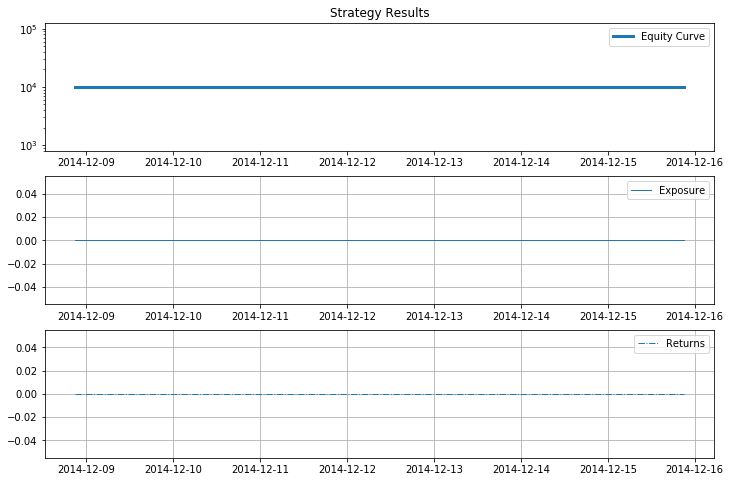

In [28]:
def initialize(context):
    # Which stock to trade
    context.stock = symbol('AAPL')
    
    # Moving average window
    context.index_average_window = 5
    
def handle_data(context, data):
    # Request history for the stock
    equities_hist = data.history(context.stock, "close", 
                                 context.index_average_window, "1d")
    print(f'type(data):{type(data)}')
    print(f'type(equities_hist):{type(equities_hist)}')
    print(equities_hist)
    
    
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    # Place order
    order_target_percent(context.stock, stock_weight)    
    
    
start_date = datetime(2014, 12, 8, tzinfo=pytz.UTC)
end_date = datetime(2014, 12, 15, tzinfo=pytz.UTC)

results = run_algorithm(
    start=start_date, 
    end=end_date, 
    initialize=initialize, 
    analyze=analyze, 
    handle_data=handle_data, 
    capital_base=10000, 
    data_frequency = 'daily', bundle='quandl' 
) 

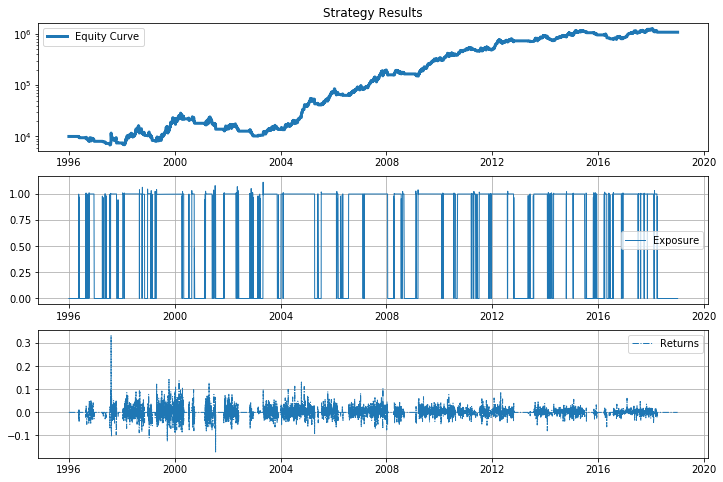

In [31]:
# This ensures that our graphs will be shown properly in the notebook.


def initialize(context):
    # Which stock to trade
    context.stock = symbol('AAPL')
    
    # Moving average window
    context.index_average_window = 100
    
def handle_data(context, data):
    # Request history for the stock
    equities_hist = data.history(context.stock, "close", 
                                 context.index_average_window, "1d")
        
    # Check if price is above moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    # Place order
    order_target_percent(context.stock, stock_weight)

def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-', 
                label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], 
            label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)

# Set start and end date
start_date = datetime(1996, 1, 1, tzinfo=pytz.UTC)
end_date = datetime(2018, 12, 31, tzinfo=pytz.UTC)
# start_date = datetime(2018, 12, 8, tzinfo=pytz.UTC)
# end_date = datetime(2018, 12, 15, tzinfo=pytz.UTC)


# Fire off the backtest
results = run_algorithm(
    start=start_date, 
    end=end_date, 
    initialize=initialize, 
    analyze=analyze, 
    handle_data=handle_data, 
    capital_base=10000, 
    data_frequency = 'daily', bundle='quandl' 
) 
